# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.8.3'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

184

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **9th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{

3

: 

['Myanmar', 'Dominica', 'Tanzania']

,
 

4

: 

['Trinidad and Tobago', 'Antigua and Barbuda', 'Belize', 'Fiji']

,
 

5

: 

[

'Grenada'

, 

'Tunisia'

, 

'Seychelles'

, 

'Lesotho'

, 

'Mauritius'

, 

'Libya'

,
     

'Bahamas'

, 

'Brunei'

, 

'Uganda'

, 

'Papua New Guinea'

, 

'Namibia'

]

,
 

6

: 

[

'Cambodia'

, 

'Venezuela'

, 

'Croatia'

, 

'Guyana'

, 

'Paraguay'

, 

'Monaco'

,
     

'Kyrgyzstan'

, 

'Ireland'

, 

'Yemen'

, 

'Lebanon'

, 

'Rwanda'

,
     

'Central African Republic'

, 

'Jordan'

, 

'Gambia'

, 

'Jamaica'

, 

'Netherlands'

,
     

'Sao Tome and Principe'

, 

'Equatorial Guinea'

, 

'Vietnam'

, 

'Syria'

,
     

'Kosovo'

]

,
 

7

: 

[

'Liechtenstein'

, 

'Kazakhstan'

, 

'Morocco'

, 

'Spain'

, 

'Eritrea'

,
     

'Saint Lucia'

, 

'Malawi'

, 

'Iceland'

, 

'Comoros'

, 

'Botswana'

, 

'Malta'

,
     

'Kenya'

, 

'Bhutan'

, 

'Cyprus'

, 

'Ethiopia'

, 

'Colombia'

, 

'San Marino'

,
     

'Barbados'

, 

'Mongolia'

, 

'Bosnia and Herzegovina'

, 

'South Sudan'

, 

'Nepal'

,
     

'Zimbabwe'

, 

'Norway'

, 

'Palestine'

, 

'Saint Vincent and the Grenadines'

,
     

'Afghanistan'

, 

'New Zealand'

, 

'Thailand'

, 

'Zambia'

, 

'Argentina'

,
     

'Philippines'

, 

'Madagascar'

, 

'Australia'

, 

'Costa Rica'

]

,
 

8

: 

[

'Tajikistan'

, 

'Congo'

, 

'Niger'

, 

'Sri Lanka'

, 

'Romania'

, 

'Suriname'

,
     

'Sudan'

, 

'Angola'

, 

'Benin'

, 

'Greece'

, 

'Israel'

, 

'Mozambique'

, 

'Taiwan'

,
     

'Albania'

, 

'Uruguay'

, 

'Slovakia'

, 

'Guatemala'

, 

'Bermuda'

, 

'South Africa'

,
     

'Djibouti'

, 

'Japan'

, 

'Maldives'

, 

'Luxembourg'

, 

'Sierra Leone'

, 

'Ghana'

,
     

'Somalia'

, 

'India'

, 

'Burundi'

, 

'Nicaragua'

, 

'Chad'

, 

'Oman'

, 

'Slovenia'

,
     

'Montenegro'

]

,
 

9

: 

[

'Germany'

, 

'China'

, 

'Belarus'

, 

'Finland'

, 

'Korea, South'

, 

'Pakistan'

,
     

'Egypt'

, 

'Iraq'

, 

'Mauritania'

, 

'Guinea-Bissau'

, 

'Georgia'

, 

'Andorra'

,
     

'Azerbaijan'

, 

'Haiti'

, 

'Czech Republic'

, 

'Swaziland'

, 

'Cape Verde'

,
     

'Cameroon'

, 

'Uzbekistan'

, 

'Qatar'

, 

'Singapore'

, 

'El Salvador'

]

,
 

10

: 

[

'Ukraine'

, 

'Belgium'

, 

'Dominican Republic'

, 

'Bulgaria'

, 

'Indonesia'

,
      

'Poland'

, 

'Serbia'

, 

'Chile'

, 

'Armenia'

, 

'Togo'

, 

'Lithuania'

, 

'Algeria'

,
      

'Malaysia'

, 

'Saudi Arabia'

, 

'Liberia'

, 

'Canada'

, 

'Switzerland'

, 

'Panama'

,
      

'Austria'

, 

'Ecuador'

, 

'Mali'

, 

'Senegal'

, 

'Latvia'

, 

'Cuba'

, 

'Gabon'

]

,
 

11

: 

[

'Honduras'

, 

'Bangladesh'

, 

'Macedonia'

, 

'Turkey'

, 

'Iran'

, 

'Portugal'

,
      

'Kuwait'

, 

'Estonia'

, 

'Moldova'

, 

'Nigeria'

, 

'Mexico'

, 

'Denmark'

, 

'France'

,
      

'Brazil'

, 

'Italy'

, 

'Peru'

, 

'Guinea'

, 

'Bolivia'

, 

'Burkina Faso'

]

,
 

12

: 

['Hungary', 'United Arab Emirates', 'Bahrain', 'United States']

,
 

13

: 

['Russia']

}

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=11)
# The number of countries
len(analyser.countries)

24

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{

11

: 

[

'Honduras'

, 

'Bangladesh'

, 

'Macedonia'

, 

'Turkey'

, 

'Iran'

, 

'Portugal'

,
      

'Kuwait'

, 

'Estonia'

, 

'Moldova'

, 

'Nigeria'

, 

'Mexico'

, 

'Denmark'

, 

'France'

,
      

'Brazil'

, 

'Italy'

, 

'Peru'

, 

'Guinea'

, 

'Bolivia'

, 

'Burkina Faso'

]

,
 

12

: 

['Hungary', 'United Arab Emirates', 'Bahrain', 'United States']

,
 

13

: 

['Russia']

}

In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Russia  0th    Past  12Feb2020  06May2020   330457362
        1st    Past  07May2020  15May2020   330457362
        2nd    Past  16May2020  23May2020   330457362
        3rd    Past  24May2020  01Jun2020   330457362
        4th    Past  02Jun2020  11Jun2020   330457362
        5th    Past  12Jun2020  20Jun2020   330457362
        6th    Past  21Jun2020  30Jun2020   330457362
        7th    Past  01Jul2020  12Jul2020   330457362
        8th    Past  13Jul2020  24Jul2020   330457362
        9th    Past  25Jul2020  07Aug2020   330457362
        10th   Past  08Aug2020  22Aug2020   330457362
        11th   Past  23Aug2020  04Sep2020   330457362
        12th   Past  05Sep2020  21Sep2020   330457362

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	BOL,  7th phase (10Aug2020 - 17Aug2020): finished  357 trials in 0 min 10 sec

	BOL,  8th phase (18Aug2020 - 25Aug2020): finished  633 trials in 0 min 20 sec

	GIN,  3rd phase (24May2020 - 06Jun2020): finished 1282 trials in 1 min  0 sec

	GIN,  8th phase (06Aug2020 - 16Aug2020): finished 1240 trials in 1 min  0 sec

	PRT,  8th phase (11Aug2020 - 27Aug2020): finished 1198 trials in 1 min  0 sec

	ITA,  3rd phase (09Apr2020 - 18Apr2020): finished  293 trials in 0 min 10 sec

	BHR,  8th phase (09Aug2020 - 21Aug2020): finished  153 trials in 0 min  5 sec

	GIN,  0th phase (03Apr2020 - 30Apr2020): finished 1200 trials in 1 min  0 sec

	MKD,  9th phase (02Sep2020 - 10Sep2020): finished  268 trials in 0 min 10 sec

	IRN,  2nd phase (18Apr2020 - 12May2020): finished  424 trials in 0 min 20 sec

	MKD,  5th phase (27Jul2020 - 05Aug2020): finished 1184 trials in 1 min  0 sec

	BRA,  6th phase (29Jul2020 - 11Aug2020): finished  919 trials in 0 min 45 sec

	GIN,  5th phase (20Jun2020 - 08Jul2020): finished  261 trials in 0 min 10 sec

	NGA,  0th phase (18Mar2020 - 21May2020): finished 1151 trials in 1 min  0 sec

	TUR, 10th phase (06Sep2020 - 21Sep2020): finished  141 trials in 0 min  5 sec

	DNK,  4th phase (04May2020 - 16May2020): finished  138 trials in 0 min  5 sec

	MDA,  2nd phase (09Jun2020 - 22Jun2020): finished 1260 trials in 1 min  0 sec

	DNK,  8th phase (15Aug2020 - 01Sep2020): finished 1245 trials in 1 min  0 sec

	TUR,  2nd phase (30Apr2020 - 08May2020): finished 1076 trials in 0 min 50 sec

	KWT,  7th phase (28Jul2020 - 10Aug2020): finished 1146 trials in 0 min 55 sec

	HUN,  5th phase (18May2020 - 29May2020): finished 1188 trials in 1 min  0 sec

	EST,  7th phase (15Jul2020 - 17Aug2020): finished 1190 trials in 1 min  0 sec

	IRN,  5th phase (17Jun2020 - 01Jul2020): finished 1186 trials in 1 min  0 sec

	BFA, 10th phase (12Sep2020 - 21Sep2020): finished 1205 trials in 1 min  0 sec

	TUR,  9th phase (21Aug2020 - 05Sep2020): finished  936 trials in 0 min 45 sec

	NGA,  9th phase (18Aug2020 - 31Aug2020): finished 1168 trials in 1 min  0 sec

	KWT,  2nd phase (28May2020 - 07Jun2020): finished 1167 trials in 1 min  0 sec

	NGA,  8th phase (08Aug2020 - 17Aug2020): finished 1182 trials in 1 min  0 sec

	BGD,  0th phase (16Mar2020 - 26May2020): finished 1110 trials in 1 min  0 sec

	ITA,  8th phase (24Jun2020 - 15Aug2020): finished  430 trials in 0 min 20 sec

	PRT,  4th phase (14Jun2020 - 25Jun2020): finished 1183 trials in 1 min  0 sec

	DNK,  0th phase (06Mar2020 - 04Apr2020): finished 1169 trials in 1 min  0 sec

	EST,  3rd phase (01May2020 - 13May2020): finished 1173 trials in 1 min  0 sec

	ARE,  5th phase (20Jun2020 - 01Jul2020): finished  711 trials in 0 min 30 sec

	BGD, 10th phase (05Sep2020 - 21Sep2020): finished  455 trials in 0 min 20 sec

	MEX,  4th phase (07Jul2020 - 17Jul2020): finished 1067 trials in 0 min 55 sec

	BRA, 10th phase (09Sep2020 - 21Sep2020): finished 1064 trials in 1 min  0 sec

	HUN,  9th phase (14Aug2020 - 26Aug2020): finished 1095 trials in 1 min  0 sec

	PRT,  9th phase (28Aug2020 - 09Sep2020): finished 1068 trials in 1 min  0 sec

	ARE,  3rd phase (21May2020 - 07Jun2020): finished 1090 trials in 1 min  0 sec

	BFA,  9th phase (03Sep2020 - 11Sep2020): finished 1131 trials in 1 min  0 sec

	ITA,  9th phase (16Aug2020 - 08Sep2020): finished 1131 trials in 1 min  0 sec

	MKD, 10th phase (11Sep2020 - 21Sep2020): finished 1144 trials in 1 min  0 sec

	USA,  2nd phase (13May2020 - 05Jun2020): finished 1170 trials in 1 min  0 sec

	RUS,  2nd phase (16May2020 - 23May2020): finished 1226 trials in 1 min  0 sec

	BFA,  3rd phase (20Apr2020 - 04May2020): finished 1228 trials in 1 min  0 sec

	DNK,  2nd phase (15Apr2020 - 23Apr2020): finished  377 trials in 0 min 15 sec

	KWT,  4th phase (23Jun2020 - 04Jul2020): finished 1250 trials in 1 min  0 sec

	GIN,  2nd phase (13May2020 - 23May2020): finished 1268 trials in 1 min  0 sec

	RUS,  8th phase (13Jul2020 - 24Jul2020): finished 1278 trials in 1 min  0 sec

	PRT, 10th phase (10Sep2020 - 21Sep2020): finished 1297 trials in 1 min  0 sec

	USA,  5th phase (08Jul2020 - 17Jul2020): finished  410 trials in 0 min 15 sec

	PRT,  1st phase (28Apr2020 - 17May2020): finished 1291 trials in 1 min  0 sec

	GIN,  4th phase (07Jun2020 - 19Jun2020): finished 1270 trials in 1 min  0 sec

	EST,  0th phase (15Mar2020 - 07Apr2020): finished 1188 trials in 1 min  0 sec

	TUR,  8th phase (03Aug2020 - 20Aug2020): finished 1196 trials in 1 min  0 sec

	IRN,  4th phase (01Jun2020 - 16Jun2020): finished 1217 trials in 1 min  0 sec

	HUN,  7th phase (26Jun2020 - 23Jul2020): finished  307 trials in 0 min 10 sec

	BOL,  6th phase (01Aug2020 - 09Aug2020): finished  160 trials in 0 min  5 sec

	PER,  1st phase (11May2020 - 28May2020): finished 1254 trials in 1 min  0 sec

	KWT,  9th phase (25Aug2020 - 06Sep2020): finished  515 trials in 0 min 20 sec

	MEX,  6th phase (28Jul2020 - 04Aug2020): finished 1322 trials in 1 min  0 sec

	BGD,  3rd phase (21Jun2020 - 28Jun2020): finished 1080 trials in 0 min 50 sec

	FRA,  3rd phase (13Apr2020 - 21Apr2020): finished 1278 trials in 1 min  0 sec

	PER,  8th phase (20Aug2020 - 28Aug2020): finished 1206 trials in 1 min  0 sec

	RUS,  7th phase (01Jul2020 - 12Jul2020): finished 1210 trials in 1 min  0 sec

	MDA,  6th phase (04Aug2020 - 15Aug2020): finished 1210 trials in 1 min  0 sec

	PER,  2nd phase (29May2020 - 13Jun2020): finished 1190 trials in 1 min  0 sec

	EST,  6th phase (04Jun2020 - 14Jul2020): finished 1204 trials in 1 min  0 sec

	PRT,  3rd phase (02Jun2020 - 13Jun2020): finished 1251 trials in 1 min  0 sec

	RUS,  3rd phase (24May2020 - 01Jun2020): finished 1270 trials in 1 min  0 sec

	FRA,  0th phase (12Feb2020 - 23Mar2020): finished 1231 trials in 1 min  0 sec

	BOL,  5th phase (23Jul2020 - 31Jul2020): finished  151 trials in 0 min  5 sec

	ARE,  9th phase (18Aug2020 - 01Sep2020): finished 1026 trials in 0 min 45 sec

	HND,  4th phase (16Jul2020 - 23Jul2020): finished 1296 trials in 1 min  0 sec

	HND,  9th phase (05Sep2020 - 12Sep2020): finished 1312 trials in 1 min  0 sec

	ITA,  5th phase (01May2020 - 10May2020): finished  441 trials in 0 min 15 sec

	MKD,  6th phase (06Aug2020 - 13Aug2020): finished 1310 trials in 1 min  0 sec

	MDA,  3rd phase (23Jun2020 - 08Jul2020): finished 1322 trials in 1 min  0 sec

	RUS,  5th phase (12Jun2020 - 20Jun2020): finished 1381 trials in 1 min  0 sec

	NGA,  2nd phase (09Jun2020 - 18Jun2020): finished 1374 trials in 1 min  0 sec

	IRN,  7th phase (16Jul2020 - 30Jul2020): finished 1347 trials in 1 min  0 sec

	KWT, 10th phase (07Sep2020 - 21Sep2020): finished  420 trials in 0 min 15 sec

	EST,  4th phase (14May2020 - 24May2020): finished 1378 trials in 1 min  0 sec

	HND,  0th phase (28Mar2020 - 07Jun2020): finished 1324 trials in 1 min  0 sec

	PRT,  0th phase (14Mar2020 - 27Apr2020): finished 1326 trials in 1 min  0 sec

	MDA,  5th phase (23Jul2020 - 03Aug2020): finished  421 trials in 0 min 15 sec

	EST,  8th phase (18Aug2020 - 27Aug2020): finished 1368 trials in 1 min  0 sec

	BGD,  1st phase (27May2020 - 12Jun2020): finished 1381 trials in 1 min  0 sec

	DNK,  7th phase (31Jul2020 - 14Aug2020): finished  554 trials in 0 min 20 sec

	USA, 10th phase (27Aug2020 - 07Sep2020): finished  159 trials in 0 min  5 sec

	MKD,  3rd phase (07Jul2020 - 16Jul2020): finished  426 trials in 0 min 15 sec

	BHR,  9th phase (22Aug2020 - 03Sep2020): finished  582 trials in 0 min 20 sec

	BHR,  0th phase (06Mar2020 - 07May2020): finished 1321 trials in 1 min  0 sec

	PRT,  7th phase (23Jul2020 - 10Aug2020): finished 1334 trials in 1 min  0 sec

	BHR,  6th phase (16Jul2020 - 26Jul2020): finished 1374 trials in 1 min  0 sec

	GIN, 10th phase (03Sep2020 - 21Sep2020): finished 1362 trials in 1 min  0 sec

	RUS, 11th phase (23Aug2020 - 04Sep2020): finished 1165 trials in 0 min 50 sec

	RUS,  6th phase (21Jun2020 - 30Jun2020): finished 1372 trials in 1 min  0 sec

	BFA,  1st phase (01Apr2020 - 09Apr2020): finished 1346 trials in 1 min  0 sec

	HND,  8th phase (22Aug2020 - 04Sep2020): finished 1344 trials in 1 min  0 sec

	BRA,  7th phase (12Aug2020 - 20Aug2020): finished 1367 trials in 1 min  0 sec

	BHR,  7th phase (27Jul2020 - 08Aug2020): finished  301 trials in 0 min 10 sec

	HUN,  1st phase (14Apr2020 - 21Apr2020): finished 1362 trials in 1 min  0 sec

	HUN,  6th phase (30May2020 - 25Jun2020): finished 1338 trials in 1 min  0 sec

	HUN, 10th phase (27Aug2020 - 12Sep2020): finished 1338 trials in 1 min  0 sec

	BOL,  9th phase (26Aug2020 - 09Sep2020): finished 1258 trials in 1 min  0 sec

	DNK,  6th phase (15Jun2020 - 30Jul2020): finished 1226 trials in 1 min  0 sec

	FRA,  2nd phase (03Apr2020 - 12Apr2020): finished 1240 trials in 1 min  0 sec

	BFA,  2nd phase (10Apr2020 - 19Apr2020): finished 1237 trials in 1 min  0 sec

	KWT,  6th phase (15Jul2020 - 27Jul2020): finished  294 trials in 0 min 10 sec

	ARE,  7th phase (11Jul2020 - 26Jul2020): finished  283 trials in 0 min 10 sec

	MEX,  9th phase (26Aug2020 - 06Sep2020): finished  242 trials in 0 min 10 sec

	NGA,  4th phase (27Jun2020 - 11Jul2020): finished 1263 trials in 1 min  0 sec

	BHR,  5th phase (06Jul2020 - 15Jul2020): finished 1229 trials in 1 min  0 sec

	BRA,  2nd phase (13Jun2020 - 25Jun2020): finished  340 trials in 0 min 15 sec

	DNK,  3rd phase (24Apr2020 - 03May2020): finished 1050 trials in 1 min  0 sec

	MEX,  0th phase (03Mar2020 - 22May2020): finished  991 trials in 1 min  0 sec

	BGD,  6th phase (19Jul2020 - 30Jul2020): finished 1005 trials in 1 min  0 sec

	ITA,  2nd phase (29Mar2020 - 08Apr2020): finished 1017 trials in 1 min  0 sec

	TUR,  0th phase (24Mar2020 - 16Apr2020): finished 1129 trials in 1 min  0 sec

	HUN,  2nd phase (22Apr2020 - 01May2020): finished 1142 trials in 1 min  0 sec

	ITA,  7th phase (23May2020 - 23Jun2020): finished  333 trials in 0 min 15 sec

	BGD,  5th phase (08Jul2020 - 18Jul2020): finished  364 trials in 0 min 15 sec

	PER,  5th phase (18Jul2020 - 31Jul2020): finished 1168 trials in 1 min  0 sec

	MKD,  0th phase (13Mar2020 - 01Jun2020): finished 1109 trials in 1 min  0 sec

	HND,  6th phase (03Aug2020 - 13Aug2020): finished  756 trials in 0 min 35 sec

	NGA,  5th phase (12Jul2020 - 20Jul2020): finished  566 trials in 0 min 25 sec

	MEX,  1st phase (23May2020 - 10Jun2020): finished  756 trials in 0 min 35 sec

	EST,  1st phase (08Apr2020 - 18Apr2020): finished 1177 trials in 1 min  0 sec

	HUN,  3rd phase (02May2020 - 09May2020): finished 1186 trials in 1 min  0 sec

	KWT,  1st phase (13May2020 - 27May2020): finished 1158 trials in 1 min  0 sec

	GIN,  9th phase (17Aug2020 - 02Sep2020): finished 1127 trials in 1 min  0 sec

	HUN,  8th phase (24Jul2020 - 13Aug2020): finished  260 trials in 0 min 10 sec

	RUS, 10th phase (08Aug2020 - 22Aug2020): finished 1159 trials in 1 min  0 sec

	MKD,  8th phase (23Aug2020 - 01Sep2020): finished 1169 trials in 1 min  0 sec

	FRA,  1st phase (24Mar2020 - 02Apr2020): finished 1240 trials in 1 min  0 sec

	BFA,  6th phase (25Jun2020 - 25Jul2020): finished 1215 trials in 1 min  0 sec

	ARE,  2nd phase (13May2020 - 20May2020): finished 1225 trials in 1 min  0 sec

	BHR,  1st phase (08May2020 - 01Jun2020): finished 1229 trials in 1 min  0 sec

	ARE,  4th phase (08Jun2020 - 19Jun2020): finished 1076 trials in 0 min 50 sec

	IRN,  6th phase (02Jul2020 - 15Jul2020): finished  138 trials in 0 min  5 sec

	TUR,  3rd phase (09May2020 - 22May2020): finished 1212 trials in 1 min  0 sec

	MKD,  1st phase (02Jun2020 - 24Jun2020): finished 1202 trials in 1 min  0 sec

	TUR,  1st phase (17Apr2020 - 29Apr2020): finished 1177 trials in 1 min  0 sec

	GIN,  1st phase (01May2020 - 12May2020): finished 1128 trials in 1 min  0 sec

	PER,  9th phase (29Aug2020 - 08Sep2020): finished 1132 trials in 1 min  0 sec

	BOL,  0th phase (01Apr2020 - 13Jun2020): finished 1094 trials in 1 min  0 sec

	PRT,  5th phase (26Jun2020 - 08Jul2020): finished 1155 trials in 1 min  0 sec

	BFA,  5th phase (20May2020 - 24Jun2020): finished 1203 trials in 1 min  0 sec

	BGD,  4th phase (29Jun2020 - 07Jul2020): finished 1121 trials in 0 min 55 sec

	PER,  4th phase (01Jul2020 - 17Jul2020): finished 1202 trials in 1 min  0 sec

	USA,  3rd phase (06Jun2020 - 24Jun2020): finished 1178 trials in 1 min  0 sec

	USA,  9th phase (15Aug2020 - 26Aug2020): finished  259 trials in 0 min 10 sec

	RUS,  0th phase (12Feb2020 - 06May2020): finished 1200 trials in 1 min  0 sec

	FRA,  7th phase (24Jun2020 - 24Jul2020): finished 1203 trials in 1 min  0 sec

	BOL,  4th phase (15Jul2020 - 22Jul2020): finished 1223 trials in 1 min  0 sec

	TUR,  5th phase (14Jun2020 - 27Jun2020): finished 1109 trials in 1 min  0 sec

	BHR,  3rd phase (14Jun2020 - 24Jun2020): finished 1104 trials in 1 min  0 sec

	FRA,  6th phase (27May2020 - 23Jun2020): finished 1053 trials in 1 min  0 sec

	HND, 10th phase (13Sep2020 - 21Sep2020): finished 1079 trials in 1 min  0 sec

	BHR,  4th phase (25Jun2020 - 05Jul2020): finished  849 trials in 0 min 40 sec

	IRN,  9th phase (17Aug2020 - 04Sep2020): finished  475 trials in 0 min 20 sec

	BRA,  8th phase (21Aug2020 - 29Aug2020): finished  222 trials in 0 min 10 sec

	RUS,  4th phase (02Jun2020 - 11Jun2020): finished 1182 trials in 1 min  0 sec

	PER,  3rd phase (14Jun2020 - 30Jun2020): finished 1142 trials in 1 min  0 sec

	ARE,  1st phase (26Apr2020 - 12May2020): finished 1115 trials in 1 min  0 sec

	BFA,  0th phase (21Mar2020 - 31Mar2020): finished 1194 trials in 1 min  0 sec

	RUS,  1st phase (07May2020 - 15May2020): finished 1183 trials in 1 min  0 sec

	BOL,  3rd phase (06Jul2020 - 14Jul2020): finished  814 trials in 0 min 35 sec

	HND,  2nd phase (25Jun2020 - 04Jul2020): finished 1104 trials in 0 min 50 sec

	KWT,  0th phase (08Mar2020 - 12May2020): finished 1088 trials in 1 min  0 sec

	MKD,  4th phase (17Jul2020 - 26Jul2020): finished  432 trials in 0 min 15 sec

	IRN,  8th phase (31Jul2020 - 16Aug2020): finished  570 trials in 0 min 20 sec

	NGA,  6th phase (21Jul2020 - 28Jul2020): finished  164 trials in 0 min  5 sec

	DNK,  1st phase (05Apr2020 - 14Apr2020): finished 1324 trials in 1 min  0 sec

	USA,  6th phase (18Jul2020 - 26Jul2020): finished  423 trials in 0 min 15 sec

	BGD,  7th phase (31Jul2020 - 12Aug2020): finished  539 trials in 0 min 20 sec

	DNK,  5th phase (17May2020 - 14Jun2020): finished  285 trials in 0 min 10 sec

	BGD,  2nd phase (13Jun2020 - 20Jun2020): finished 1336 trials in 1 min  0 sec

	KWT,  8th phase (11Aug2020 - 24Aug2020): finished  465 trials in 0 min 20 sec

	NGA,  7th phase (29Jul2020 - 07Aug2020): finished 1211 trials in 1 min  0 sec

	FRA,  4th phase (22Apr2020 - 04May2020): finished 1221 trials in 1 min  0 sec

	MKD,  2nd phase (25Jun2020 - 06Jul2020): finished 1194 trials in 1 min  0 sec

	GIN,  7th phase (24Jul2020 - 05Aug2020): finished  420 trials in 0 min 15 sec

	BOL,  2nd phase (26Jun2020 - 05Jul2020): finished  233 trials in 0 min 10 sec

	KWT,  3rd phase (08Jun2020 - 22Jun2020): finished 1249 trials in 1 min  0 sec

	BFA,  4th phase (05May2020 - 19May2020): finished 1302 trials in 1 min  0 sec

	BHR, 10th phase (04Sep2020 - 12Sep2020): finished 1272 trials in 1 min  0 sec

	NGA, 10th phase (01Sep2020 - 21Sep2020): finished 1302 trials in 1 min  0 sec

	GIN,  6th phase (09Jul2020 - 23Jul2020): finished 1328 trials in 1 min  0 sec

	RUS,  9th phase (25Jul2020 - 07Aug2020): finished 1316 trials in 1 min  0 sec

	PRT,  2nd phase (18May2020 - 01Jun2020): finished 1325 trials in 1 min  0 sec

	FRA,  9th phase (14Aug2020 - 31Aug2020): finished  505 trials in 0 min 20 sec

	USA,  8th phase (06Aug2020 - 14Aug2020): finished  247 trials in 0 min 10 sec

	BGD,  8th phase (13Aug2020 - 24Aug2020): finished 1248 trials in 1 min  0 sec

	HND,  7th phase (14Aug2020 - 21Aug2020): finished  756 trials in 0 min 35 sec

	TUR,  4th phase (23May2020 - 13Jun2020): finished  216 trials in 0 min 10 sec

	HND,  3rd phase (05Jul2020 - 15Jul2020): finished 1218 trials in 1 min  0 sec

	FRA,  5th phase (05May2020 - 26May2020): finished 1237 trials in 1 min  0 sec

	HND,  1st phase (08Jun2020 - 24Jun2020): finished 1301 trials in 1 min  0 sec

	HND,  5th phase (24Jul2020 - 02Aug2020): finished 1329 trials in 1 min  0 sec

	EST,  5th phase (25May2020 - 03Jun2020): finished  145 trials in 0 min  5 sec

	HUN,  4th phase (10May2020 - 17May2020): finished  152 trials in 0 min  5 sec

	IRN,  0th phase (26Feb2020 - 29Mar2020): finished 1308 trials in 1 min  0 sec

	EST,  2nd phase (19Apr2020 - 30Apr2020): finished 1315 trials in 1 min  0 sec

	NGA,  3rd phase (19Jun2020 - 26Jun2020): finished 1310 trials in 1 min  0 sec

	MEX,  5th phase (18Jul2020 - 27Jul2020): finished 1320 trials in 1 min  0 sec

	USA,  0th phase (09Feb2020 - 18Apr2020): finished 1272 trials in 1 min  0 sec

	MEX,  7th phase (05Aug2020 - 14Aug2020): finished 1324 trials in 1 min  0 sec

	MEX,  2nd phase (11Jun2020 - 23Jun2020): finished 1307 trials in 1 min  0 sec

	TUR,  7th phase (14Jul2020 - 02Aug2020): finished  250 trials in 0 min 10 sec

	ARE,  0th phase (12Feb2020 - 25Apr2020): finished 1243 trials in 1 min  0 sec

	USA,  1st phase (19Apr2020 - 12May2020): finished 1301 trials in 1 min  1 sec

	KWT,  5th phase (05Jul2020 - 14Jul2020): finished  271 trials in 0 min 10 sec

	HUN,  0th phase (14Mar2020 - 13Apr2020): finished 1245 trials in 1 min  0 sec

	MKD,  7th phase (14Aug2020 - 22Aug2020): finished 1267 trials in 1 min  0 sec

	TUR,  6th phase (28Jun2020 - 13Jul2020): finished  295 trials in 0 min 10 sec

	USA,  4th phase (25Jun2020 - 07Jul2020): finished 1257 trials in 1 min  0 sec

	PER,  6th phase (01Aug2020 - 10Aug2020): finished 1341 trials in 1 min  0 sec

	MEX,  3rd phase (24Jun2020 - 06Jul2020): finished 1360 trials in 1 min  0 sec

	IRN,  3rd phase (13May2020 - 31May2020): finished  181 trials in 0 min  5 sec

	FRA,  8th phase (25Jul2020 - 13Aug2020): finished  293 trials in 0 min 10 sec

	USA, 11th phase (08Sep2020 - 21Sep2020): finished  664 trials in 0 min 25 sec

	BRA,  9th phase (30Aug2020 - 08Sep2020): finished 1431 trials in 1 min  0 sec

	ITA,  0th phase (24Feb2020 - 20Mar2020): finished 1438 trials in 1 min  0 sec

	PRT,  6th phase (09Jul2020 - 22Jul2020): finished 1418 trials in 1 min  0 sec

	ITA,  6th phase (11May2020 - 22May2020): finished  175 trials in 0 min  5 sec

	BGD,  9th phase (25Aug2020 - 04Sep2020): finished  449 trials in 0 min 15 sec

	MDA,  8th phase (25Aug2020 - 02Sep2020): finished 1137 trials in 0 min 40 sec

	IRN,  1st phase (30Mar2020 - 17Apr2020): finished 1526 trials in 1 min  0 sec

	MDA,  7th phase (16Aug2020 - 24Aug2020): finished 1579 trials in 1 min  0 sec

	BRA,  3rd phase (26Jun2020 - 07Jul2020): finished 1546 trials in 1 min  0 sec

	BFA,  8th phase (15Aug2020 - 02Sep2020): finished  330 trials in 0 min 10 sec

	EST,  9th phase (28Aug2020 - 04Sep2020): finished  177 trials in 0 min  5 sec

	ITA,  1st phase (21Mar2020 - 28Mar2020): finished 1539 trials in 1 min  0 sec

	MEX,  8th phase (15Aug2020 - 25Aug2020): finished  192 trials in 0 min  5 sec

	BRA,  4th phase (08Jul2020 - 20Jul2020): finished  363 trials in 0 min 10 sec

	MDA,  0th phase (17Mar2020 - 12May2020): finished 1492 trials in 1 min  0 sec

	MDA,  1st phase (13May2020 - 08Jun2020): finished  995 trials in 0 min 35 sec

	NGA,  1st phase (22May2020 - 08Jun2020): finished 1548 trials in 1 min  0 sec

	ARE,  6th phase (02Jul2020 - 10Jul2020): finished 1570 trials in 1 min  0 sec

	BFA,  7th phase (26Jul2020 - 14Aug2020): finished  872 trials in 0 min 30 sec

	PER,  0th phase (16Mar2020 - 10May2020): finished 1499 trials in 1 min  0 sec

	PER,  7th phase (11Aug2020 - 19Aug2020): finished 1544 trials in 1 min  0 sec

	MDA,  9th phase (03Sep2020 - 10Sep2020): finished  825 trials in 0 min 25 sec

	ARE,  8th phase (27Jul2020 - 17Aug2020): finished  995 trials in 0 min 30 sec

Completed optimization. Total: 49 min 40 sec

In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE    Rt  \
Country Phase                                                        
Russia  0th    Past  12Feb2020  06May2020   330457362  SIR-F  0.02   
        1st    Past  07May2020  15May2020   330457362  SIR-F  2.46   
        2nd    Past  16May2020  23May2020   330457362  SIR-F  1.51   
        3rd    Past  24May2020  01Jun2020   330457362  SIR-F  1.08   
        4th    Past  02Jun2020  11Jun2020   330457362  SIR-F  0.97   
        5th    Past  12Jun2020  20Jun2020   330457362  SIR-F  0.82   
        6th    Past  21Jun2020  30Jun2020   330457362  SIR-F   0.9   
        7th    Past  01Jul2020  12Jul2020   330457362  SIR-F  0.91   
        8th    Past  13Jul2020  24Jul2020   330457362  SIR-F  0.68   
        9th    Past  25Jul2020  07Aug2020   330457362  SIR-F  0.78   
        10th   Past  08Aug2020  22Aug2020   330457362  SIR-F  0.73   
        11th   Past  23Aug2020  04Sep2020   330457362  SIR-F  0.79   
        12th   Past  05Sep2020  21Sep2020   330457362      -     -   

                     theta        kappa         rho       sigma  tau  \
Country Phase                                                          
Russia  0th       0.602763     0.544883   0.0340813  0.00229851  360   
        1st    0.000638701  0.000116581   0.0130188  0.00517845  360   
        2nd    0.000440065   9.8046e-05  0.00763724  0.00494162  360   
        3rd    0.000343538  0.000113249  0.00557086  0.00505496  360   
        4th    0.000544411  9.44583e-05  0.00479535  0.00483491  360   
        5th      0.0218621  1.88817e-06  0.00354709  0.00424531  360   
        6th       0.021825  1.88817e-06  0.00276866  0.00301643  360   
        7th     0.00155965  6.92055e-05  0.00243233  0.00260801  360   
        8th    1.96758e-05  4.07333e-05  0.00191564   0.0027832  360   
        9th      0.0205683  3.65782e-06   0.0016005   0.0020129  360   
        10th   4.66566e-05  4.09311e-05  0.00130861  0.00174042  360   
        11th    0.00226497   3.1287e-05  0.00125593  0.00154782  360   
        12th             -            -           -           -    -   

              1/alpha2 [day] alpha1 [-] 1/beta [day] 1/gamma [day]      RMSLE  \
Country Phase                                                                   
Russia  0th                0      0.603            7           108    18.9667   
        1st             2144      0.001           19            48  0.0663921   
        2nd             2549          0           32            50  0.0570082   
        3rd             2207          0           44            49  0.0763248   
        4th             2646      0.001           52            51  0.0731581   
        5th           132403      0.022           70            58  0.0597586   
        6th           132403      0.022           90            82  0.0496409   
        7th             3612      0.002          102            95  0.0540541   
        8th             6137          0          130            89  0.0590419   
        9th            68346      0.021          156           124  0.0522163   
        10th            6107          0          191           143   0.053408   
        11th            7990      0.002          199           161  0.0119786   
        12th               -          -            -             -          -   

              Trials       Runtime  
Country Phase                       
Russia  0th     1200  1 min  0 sec  
        1st     1183  1 min  0 sec  
        2nd     1226  1 min  0 sec  
        3rd     1270  1 min  0 sec  
        4th     1182  1 min  0 sec  
        5th     1381  1 min  0 sec  
        6th     1372  1 min  0 sec  
        7th     1210  1 min  0 sec  
        8th     1278  1 min  0 sec  
        9th     1316  1 min  0 sec  
        10th    1159  1 min  0 sec  
        11th    1165  0 min 50 sec  
        12th       -             -

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-28,Honduras,0.0205317,0.000570602,0.0178358,0.00124714,0.021,438,14,200,...,2,4,2,3,2,4,2,1,1,100.0
1,2020-03-29,Honduras,0.0205317,0.000570602,0.0178358,0.00124714,0.021,438,14,200,...,2,4,2,3,2,4,2,1,1,100.0
2,2020-03-30,Honduras,0.0205317,0.000570602,0.0178358,0.00124714,0.021,438,14,200,...,2,4,2,3,2,4,2,1,1,100.0
3,2020-03-31,Honduras,0.0205317,0.000570602,0.0178358,0.00124714,0.021,438,14,200,...,2,4,2,3,2,4,2,1,1,100.0
4,2020-04-01,Honduras,0.0205317,0.000570602,0.0178358,0.00124714,0.021,438,14,200,...,2,4,2,3,2,4,2,1,1,100.0


### $Rt$: Reprodcution number $\mathrm{[-]}$

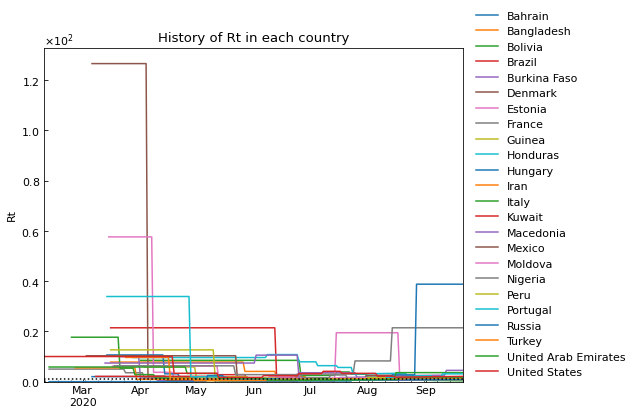

Country,Bahrain,Bangladesh,Bolivia,Brazil,Burkina Faso,Denmark,Estonia,France,Guinea,Honduras,...,Macedonia,Mexico,Moldova,Nigeria,Peru,Portugal,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-17,1.86,0.66,0.36,0.99,4.51,0.78,1.29,21.44,0.68,0.83,...,1.18,1.08,1.81,0.72,0.66,3.12,0.79,1.34,1.66,2.11
2020-09-18,1.86,0.66,0.36,0.99,4.51,0.78,1.29,21.44,0.68,0.83,...,1.18,1.08,1.81,0.72,0.66,3.12,0.79,1.34,1.66,2.11
2020-09-19,1.86,0.66,0.36,0.99,4.51,0.78,1.29,21.44,0.68,0.83,...,1.18,1.08,1.81,0.72,0.66,3.12,0.79,1.34,1.66,2.11
2020-09-20,1.86,0.66,0.36,0.99,4.51,0.78,1.29,21.44,0.68,0.83,...,1.18,1.08,1.81,0.72,0.66,3.12,0.79,1.34,1.66,2.11
2020-09-21,1.86,0.66,0.36,0.99,4.51,0.78,1.29,21.44,0.68,0.83,...,1.18,1.08,1.81,0.72,0.66,3.12,0.79,1.34,1.66,2.11


In [14]:
analyser.param_history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

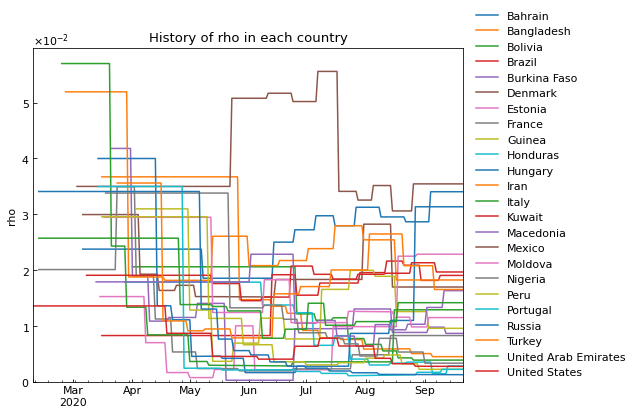

Country,Bahrain,Bangladesh,Bolivia,Brazil,Burkina Faso,Denmark,Estonia,France,Guinea,Honduras,...,Macedonia,Mexico,Moldova,Nigeria,Peru,Portugal,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-17,0.034042,0.004488,0.003869,0.019046,0.008657,0.016966,0.022846,0.008271,0.009566,0.002817,...,0.016315,0.035447,0.01149,0.003318,0.002221,0.002217,0.001256,0.016523,0.014157,0.002737
2020-09-18,0.034042,0.004488,0.003869,0.019046,0.008657,0.016966,0.022846,0.008271,0.009566,0.002817,...,0.016315,0.035447,0.01149,0.003318,0.002221,0.002217,0.001256,0.016523,0.014157,0.002737
2020-09-19,0.034042,0.004488,0.003869,0.019046,0.008657,0.016966,0.022846,0.008271,0.009566,0.002817,...,0.016315,0.035447,0.01149,0.003318,0.002221,0.002217,0.001256,0.016523,0.014157,0.002737
2020-09-20,0.034042,0.004488,0.003869,0.019046,0.008657,0.016966,0.022846,0.008271,0.009566,0.002817,...,0.016315,0.035447,0.01149,0.003318,0.002221,0.002217,0.001256,0.016523,0.014157,0.002737
2020-09-21,0.034042,0.004488,0.003869,0.019046,0.008657,0.016966,0.022846,0.008271,0.009566,0.002817,...,0.016315,0.035447,0.01149,0.003318,0.002221,0.002217,0.001256,0.016523,0.014157,0.002737


In [15]:
analyser.param_history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

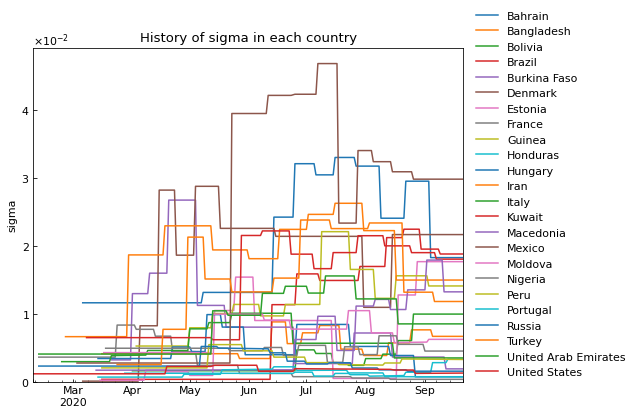

Country,Bahrain,Bangladesh,Bolivia,Brazil,Burkina Faso,Denmark,Estonia,France,Guinea,Honduras,...,Macedonia,Mexico,Moldova,Nigeria,Peru,Portugal,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-17,0.018239,0.006665,0.009938,0.01877,0.001885,0.021624,0.017645,0.000349,0.014072,0.003321,...,0.013207,0.029769,0.006223,0.004504,0.003266,0.000707,0.001548,0.01179,0.008498,0.001269
2020-09-18,0.018239,0.006665,0.009938,0.01877,0.001885,0.021624,0.017645,0.000349,0.014072,0.003321,...,0.013207,0.029769,0.006223,0.004504,0.003266,0.000707,0.001548,0.01179,0.008498,0.001269
2020-09-19,0.018239,0.006665,0.009938,0.01877,0.001885,0.021624,0.017645,0.000349,0.014072,0.003321,...,0.013207,0.029769,0.006223,0.004504,0.003266,0.000707,0.001548,0.01179,0.008498,0.001269
2020-09-20,0.018239,0.006665,0.009938,0.01877,0.001885,0.021624,0.017645,0.000349,0.014072,0.003321,...,0.013207,0.029769,0.006223,0.004504,0.003266,0.000707,0.001548,0.01179,0.008498,0.001269
2020-09-21,0.018239,0.006665,0.009938,0.01877,0.001885,0.021624,0.017645,0.000349,0.014072,0.003321,...,0.013207,0.029769,0.006223,0.004504,0.003266,0.000707,0.001548,0.01179,0.008498,0.001269


In [16]:
analyser.param_history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

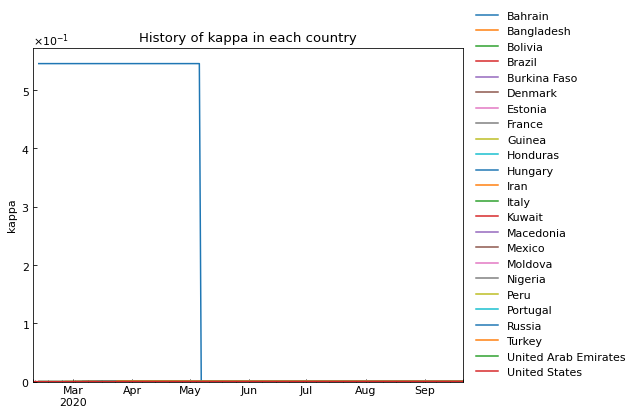

Country,Bahrain,Bangladesh,Bolivia,Brazil,Burkina Faso,Denmark,Estonia,France,Guinea,Honduras,...,Macedonia,Mexico,Moldova,Nigeria,Peru,Portugal,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-17,0.000077,0.000087,0.000156,0.000425,0.000031,0.000041,0.000079,0.000037,0.000069,0.000069,...,0.000172,0.001072,0.000002,0.000104,0.000036,0.000001,0.000031,0.000516,0.000021,0.000002
2020-09-18,0.000077,0.000087,0.000156,0.000425,0.000031,0.000041,0.000079,0.000037,0.000069,0.000069,...,0.000172,0.001072,0.000002,0.000104,0.000036,0.000001,0.000031,0.000516,0.000021,0.000002
2020-09-19,0.000077,0.000087,0.000156,0.000425,0.000031,0.000041,0.000079,0.000037,0.000069,0.000069,...,0.000172,0.001072,0.000002,0.000104,0.000036,0.000001,0.000031,0.000516,0.000021,0.000002
2020-09-20,0.000077,0.000087,0.000156,0.000425,0.000031,0.000041,0.000079,0.000037,0.000069,0.000069,...,0.000172,0.001072,0.000002,0.000104,0.000036,0.000001,0.000031,0.000516,0.000021,0.000002
2020-09-21,0.000077,0.000087,0.000156,0.000425,0.000031,0.000041,0.000079,0.000037,0.000069,0.000069,...,0.000172,0.001072,0.000002,0.000104,0.000036,0.000001,0.000031,0.000516,0.000021,0.000002


In [17]:
analyser.param_history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

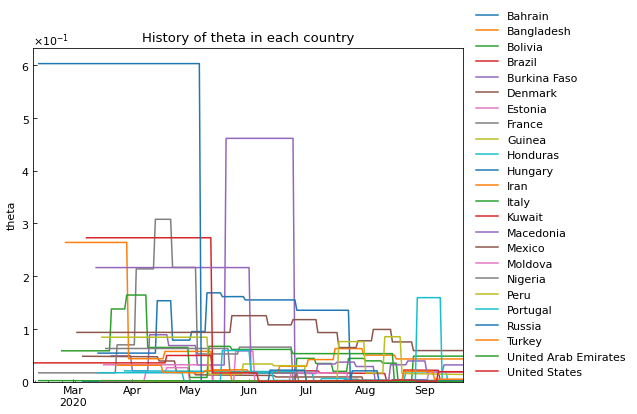

Country,Bahrain,Bangladesh,Bolivia,Brazil,Burkina Faso,Denmark,Estonia,France,Guinea,Honduras,...,Macedonia,Mexico,Moldova,Nigeria,Peru,Portugal,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-17,0.000771,0.00048,0.048458,0.000222,0.000938,0.000019,0.000807,0.000684,0.001058,0.001573,...,0.031817,0.058955,0.017978,0.000191,0.013719,0.002496,0.002265,0.004787,0.000679,0.018944
2020-09-18,0.000771,0.00048,0.048458,0.000222,0.000938,0.000019,0.000807,0.000684,0.001058,0.001573,...,0.031817,0.058955,0.017978,0.000191,0.013719,0.002496,0.002265,0.004787,0.000679,0.018944
2020-09-19,0.000771,0.00048,0.048458,0.000222,0.000938,0.000019,0.000807,0.000684,0.001058,0.001573,...,0.031817,0.058955,0.017978,0.000191,0.013719,0.002496,0.002265,0.004787,0.000679,0.018944
2020-09-20,0.000771,0.00048,0.048458,0.000222,0.000938,0.000019,0.000807,0.000684,0.001058,0.001573,...,0.031817,0.058955,0.017978,0.000191,0.013719,0.002496,0.002265,0.004787,0.000679,0.018944
2020-09-21,0.000771,0.00048,0.048458,0.000222,0.000938,0.000019,0.000807,0.000684,0.001058,0.001573,...,0.031817,0.058955,0.017978,0.000191,0.013719,0.002496,0.002265,0.004787,0.000679,0.018944


In [18]:
analyser.param_history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52274 entries, 0 to 52595
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 52274 non-null  datetime64[ns]
 1   Country                              52274 non-null  object        
 2   Rt                                   52274 non-null  float64       
 3   theta                                52274 non-null  float64       
 4   kappa                                52274 non-null  float64       
 5   rho                                  52274 non-null  float64       
 6   sigma                                52274 non-null  float64       
 7   School_closing                       52274 non-null  int64         
 8   Workplace_closing                    52274 non-null  int64         
 9   Cancel_events                        52274 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.187141,-0.201923,0.210792,-0.187544,-0.055105,0.007929,-0.105940,-0.073938,-0.112681,-0.144483,-0.154857,-0.144288,-0.053776,-0.148766,-0.224735,-0.088259
theta,-0.187141,1.000000,0.979059,0.725527,-0.078086,-0.219948,-0.118009,-0.286714,-0.286267,-0.271844,0.132837,-0.070799,0.135730,-0.353241,-0.304943,-0.013176,-0.155724
kappa,-0.201923,0.979059,1.000000,0.699420,-0.106903,-0.240239,-0.147468,-0.285684,-0.274505,-0.276521,0.123421,-0.060623,0.157114,-0.350104,-0.234764,0.010638,-0.177864
rho,0.210792,0.725527,0.699420,1.000000,0.096773,-0.147631,-0.064855,-0.336002,-0.306044,-0.282585,0.096012,-0.142508,0.007819,-0.358964,-0.420651,-0.163996,-0.147708
sigma,-0.187544,-0.078086,-0.106903,0.096773,1.000000,0.139481,0.015445,-0.001117,-0.117578,0.038784,-0.009210,-0.083437,-0.020804,0.095716,-0.095486,0.132531,0.072186
School_closing,-0.055105,-0.219948,-0.240239,-0.147631,0.139481,1.000000,0.738557,0.735698,0.660390,0.547463,0.571535,0.537261,0.491307,0.711749,0.424368,0.295211,0.818038
Workplace_closing,0.007929,-0.118009,-0.147468,-0.064855,0.015445,0.738557,1.000000,0.717981,0.760864,0.569845,0.680360,0.655489,0.489770,0.768314,0.456383,0.307194,0.865785
Cancel_events,-0.105940,-0.286714,-0.285684,-0.336002,-0.001117,0.735698,0.717981,1.000000,0.805426,0.484911,0.550300,0.646025,0.562364,0.874219,0.602598,0.586301,0.838028
Gatherings_restrictions,-0.073938,-0.286267,-0.274505,-0.306044,-0.117578,0.660390,0.760864,0.805426,1.000000,0.686125,0.653111,0.745686,0.606864,0.816379,0.631234,0.389873,0.865557
Transport_closing,-0.112681,-0.271844,-0.276521,-0.282585,0.038784,0.547463,0.569845,0.484911,0.686125,1.000000,0.602466,0.668097,0.537544,0.518350,0.336622,0.170885,0.749792


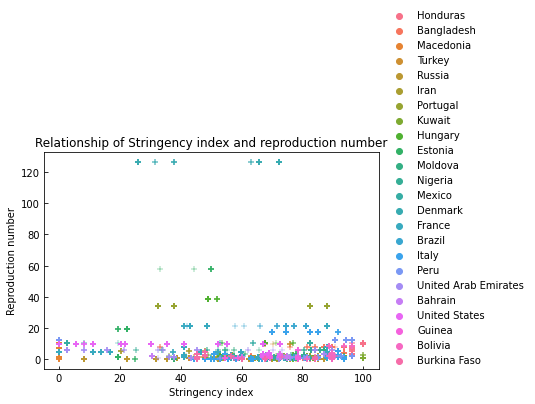

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()